In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

<br><br>
<font size='6'><b>Supervised Learning</b></font><br><br>

<table style="border-style: hidden; border-collapse: collapse;" width = "80%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 60% style="border-style: hidden; border-collapse: collapse;">

        </td>
        <td width = 20%>
        by Seungtae Park<br>iSystems Design Lab<br>http://isystems.unist.ac.kr/<br>UNIST
        </td>
    </tr>
</table>

Table of Contents
<div id="toc"></div>

# 0. Supervised learning
- Output data is given

<img src='./image_files/Supervised learning.png', width=500>

In [1]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

# 1. Linear Regression

- Regression에 쓸 데이터 생성

In [2]:
import numpy as np

In [3]:
N = 100
w1 = 3
w0 = 2
x = np.random.uniform(0, 10, N)
y = w1*x + w0 + 5*np.random.normal(0, 1, N)

In [4]:
import matplotlib.pyplot as plt

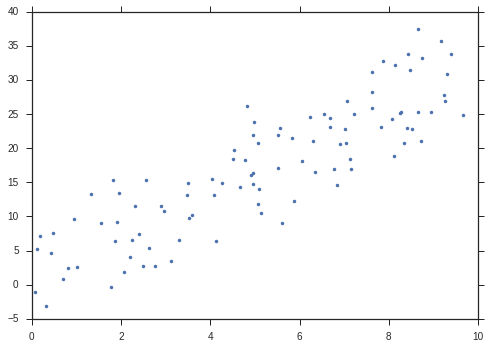

In [5]:
plt.plot(x,y,'.')
plt.show()

- sklearn.linear_model에 있는 LinearRegression import

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
reg = LinearRegression()
reg.fit(x.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

- 새로운 데이터에 대하여 확인

In [8]:
x_new = np.array([[6]])

In [9]:
pred = reg.predict(x_new)

In [10]:
print(pred)

[ 19.59910767]


- 결과 확인

In [11]:
w1_pred = reg.coef_
w0_pred = reg.intercept_
print('W1 pred : ', w1_pred[0])
print('W1 original : ', w1)
print('W0 pred : ', w0_pred)
print('W0 : ', w0)

W1 pred :  3.00143081719
W1 original :  3
W0 pred :  1.590522766
W0 :  2


In [12]:
t = np.linspace(0,10)
ty = w1_pred*t + w0_pred

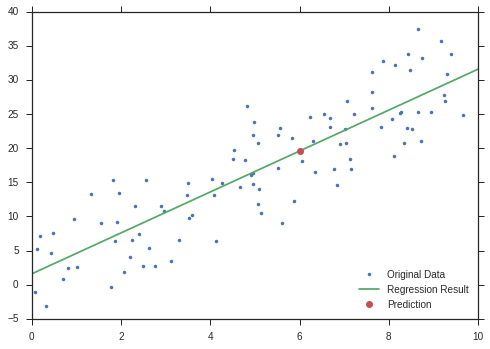

In [13]:
plt.plot(x,y,'.', label = 'Original Data')
plt.plot(t,ty, label = 'Regression Result')
plt.plot(x_new, pred, 'ro', label = 'Prediction')
plt.legend(loc = 'lower right')
plt.show()

- Image linear regression

<img src='./image_files/three_pictures2.png', width=500>
<img src='./image_files/Capture3.png', width=500>

# 1. Data Load

- cPickle을 이용하여 데이터 로드

In [14]:
from six.moves import cPickle

In [15]:
data = cPickle.load(open('./data_files/data.pkl', 'rb'))

- Dictionary 형태로 저장되어 있는 데이터

In [16]:
print(data.keys())
X1 = data['X1']
y1 = data['y1']
X2 = data['X2']
y2 = data['y2']
X3 = data['X3']
y3 = data['y3']
print(X1.shape, y1.shape)
print(X2.shape, y2.shape)
print(X3.shape, y3.shape)

dict_keys(['X2', 'X3', 'y3', 'y2', 'X1', 'y1'])
(200, 2) (200,)
(200, 2) (200,)
(200, 2) (200,)


- Plot을 통하여 데이터 파악

In [17]:
import matplotlib.pyplot as plt

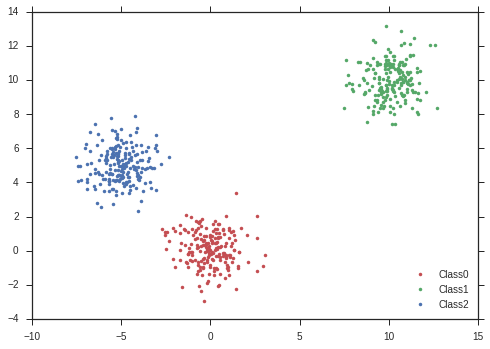

In [18]:
plt.plot(X1[:,0], X1[:,1], 'r.', label='Class0')
plt.plot(X2[:,0], X2[:,1], 'g.', label='Class1')
plt.plot(X3[:,0], X3[:,1], 'b.', label='Class2')
plt.legend(loc='lower right')
plt.show()


# 2. Logistic Regression

- Class에 속하는 확률을 알 수 있는 모델
- 이름은 regression이지만 classification 모델

## 2.1. Binary Classification

- X1과 X2데이터를 분류
- 데이터를 X, y로 병합

In [19]:
X = np.vstack([X1, X2])
y = np.concatenate([y1, y2])

- Plot을 통하여 결과 확인

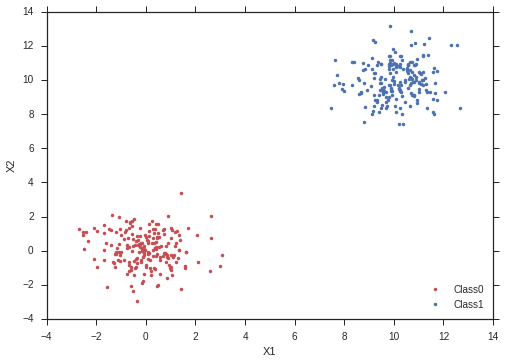

In [20]:
plt.plot(X[y==0,0], X[y==0,1], 'r.', label='Class0')
plt.plot(X[y==1,0], X[y==1,1], 'b.', label='Class1')
plt.legend(loc='lower right')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [21]:
print(y)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1

- Sklearn linear_model을 import
- LogisticRegression 개체를 선언후 피팅

In [22]:
from sklearn import linear_model

In [23]:
clf = linear_model.LogisticRegression()
clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

- 새로운 데이터에 대한 결과 확인
- Input shape을 맞추는 것에 주의

In [24]:
X_new = np.array([2,0])
X_new = X_new.reshape(1,-1)
X_new.shape

(1, 2)

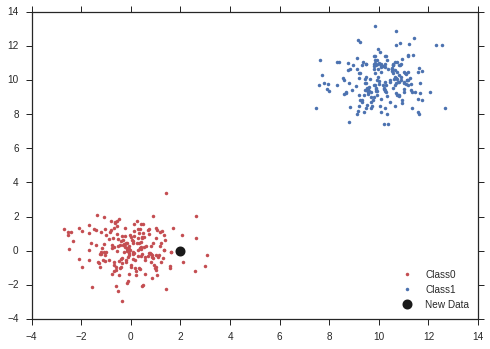

In [25]:
plt.plot(X[y==0,0], X[y==0,1], 'r.', label='Class0')
plt.plot(X[y==1,0], X[y==1,1], 'b.', label='Class1')
plt.plot(X_new[0,0], X_new[0,1], 'ko', label='New Data', ms=5, mew=5)
plt.legend(loc='lower right')
plt.show()

- Class0에 속함

In [26]:
pred = clf.predict(X_new)
print(pred)

[ 0.]


## 2.2. Multi Classification

- X1, X2, X3 데이터를 분류
- Binary classification 에 이용된 코드와 동일
- X, y로 병합

In [27]:
X = np.vstack([X1, X2, X3])
y = np.concatenate([y1, y2, y3])

- Plot을 통하여 결과 확인

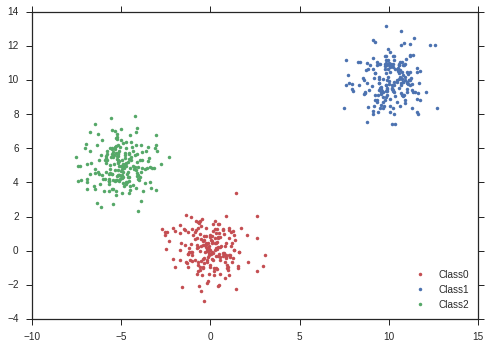

In [28]:
plt.plot(X[y==0,0], X[y==0,1], 'r.', label='Class0')
plt.plot(X[y==1,0], X[y==1,1], 'b.', label='Class1')
plt.plot(X[y==2,0], X[y==2,1], 'g.', label='Class2')
plt.legend(loc='lower right')
plt.show()

- Sklearn linear_model을 import
- LogisticRegression 개체를 선언후 피팅

In [29]:
from sklearn import linear_model

In [30]:
clf = linear_model.LogisticRegression()
clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

- 새로운 데이터에 대한 결과 확인
- Input shape을 맞추는 것에 주의

In [31]:
X_new = np.array([7,10])
X_new = X_new.reshape(1,-1)
X_new.shape

(1, 2)

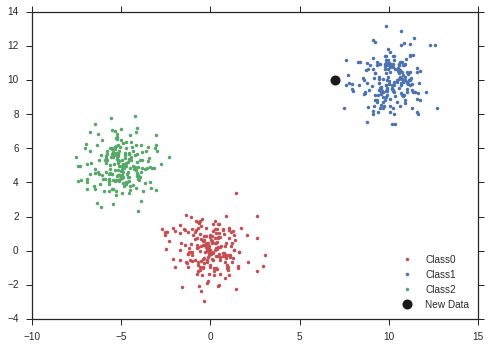

In [32]:
plt.plot(X[y==0,0], X[y==0,1], 'r.', label='Class0')
plt.plot(X[y==1,0], X[y==1,1], 'b.', label='Class1')
plt.plot(X[y==2,0], X[y==2,1], 'g.', label='Class2')
plt.plot(X_new[0,0], X_new[0,1], 'ko', label='New Data', ms=5, mew=5)
plt.legend(loc='lower right')
plt.show()

- Predict로 예측

In [33]:
prob = clf.predict(X_new)
print(prob)

[ 1.]


## 2.3. Visualization

- 경계선 시각화
- 이부분은 코드를 이해할필요는 없고, 개념적인것만 이해하시면 됩니다
- 마지막 그림만 이해하기

In [35]:
X = np.vstack([X1, X2])
y = np.concatenate([y1, y2])
clf = linear_model.LogisticRegression()
clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [36]:
xx, yy = np.mgrid[-10:15:.01, -4:14:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)

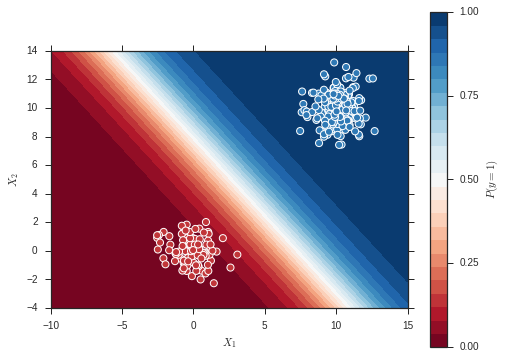

In [37]:
f, ax = plt.subplots(figsize=(8, 6))
contour = ax.contourf(xx, yy, probs, 25, cmap="RdBu",
                      vmin=0, vmax=1)
ax_c = f.colorbar(contour)
ax_c.set_label("$P(y = 1)$")
ax_c.set_ticks([0, .25, .5, .75, 1])

ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
           cmap="RdBu", vmin=-.2, vmax=1.2,
           edgecolor="white", linewidth=1)

ax.set(aspect="equal",
       xlim=(-10, 15), ylim=(-4, 14),
       xlabel="$X_1$", ylabel="$X_2$")

plt.show()

# 3. Support Vector Machine (SVM)

- 경계선과 데이터 사이의 margin을 최대화 하는 모델
- 가장 범용적으로 쓰이는 모델

<img src = "./image_files/SVM.png", width=400>

## 3.1. Binary Classification

- X1과 X2데이터를 분류
- 데이터를 X, y로 병합

In [38]:
X = np.vstack([X1, X2])
y = np.concatenate([y1, y2])

- sklearn.svm 모듈에서 SVC import
- svc개체를 선언후 피팅

In [39]:
from sklearn.svm import SVC

In [40]:
svc = SVC()
svc.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

- 새로운 데이터에 대한 결과 확인
- Input shape을 맞추는 것에 주의

In [41]:
X_new = np.array([7,10])
X_new = X_new.reshape(1,-1)
X_new.shape

(1, 2)

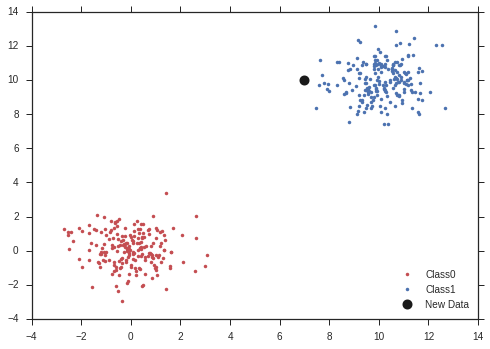

In [42]:
plt.plot(X[y==0,0], X[y==0,1], 'r.', label='Class0')
plt.plot(X[y==1,0], X[y==1,1], 'b.', label='Class1')
plt.plot(X_new[0,0], X_new[0,1], 'ko', label='New Data', ms=5, mew=5)
plt.legend(loc='lower right')
plt.show()

- 새로운 데이터는 Class1에 속함

In [43]:
svc.predict(X_new)

array([ 1.])

## 3.2. Multi Classification

- X1, X2, X3 데이터를 분류
- Binary classification 에 이용된 코드와 동일
- X, y로 병합

In [44]:
X = np.vstack([X1, X2, X3])
y = np.concatenate([y1, y2, y3])

- sklearn.svm 모듈에서 SVC import
- svc개체를 선언후 피팅

In [45]:
from sklearn.svm import SVC

In [46]:
svc = SVC()
svc.fit(X,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

- 새로운 데이터에 대한 결과 확인
- Input shape을 맞추는 것에 주의

In [47]:
X_new = np.array([-5,4])
X_new = X_new.reshape(1,-1)
X_new.shape

(1, 2)

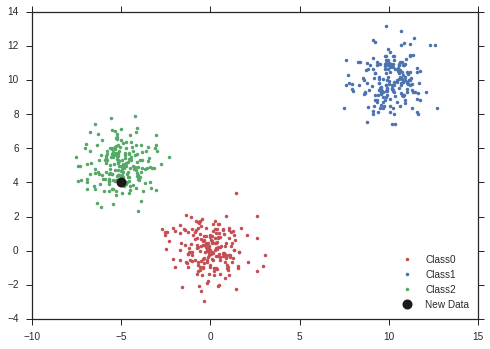

In [48]:
plt.plot(X[y==0,0], X[y==0,1], 'r.', label='Class0')
plt.plot(X[y==1,0], X[y==1,1], 'b.', label='Class1')
plt.plot(X[y==2,0], X[y==2,1], 'g.', label='Class2')
plt.plot(X_new[0,0], X_new[0,1], 'ko', label='New Data', ms=5, mew=5)
plt.legend(loc='lower right')
plt.show()

- 새로운 데이터는 Class1에 속함

In [49]:
svc.predict(X_new)

array([ 2.])

## 3.3. Nonlinear SVM

- 이부분은 코드를 이해할필요는 없고, 개념적인것만 이해하시면 됩니다
- 마지막 그림 이해하기

In [50]:
X = np.vstack([X1, X2, X3])
y = np.concatenate([y1, y2, y3])

In [51]:
from sklearn.svm import SVC

In [52]:
svc = SVC(kernel='linear', C=1).fit(X, y)
rbf_svc = SVC(kernel='rbf', C=1, gamma=0.7).fit(X, y)

In [53]:
# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

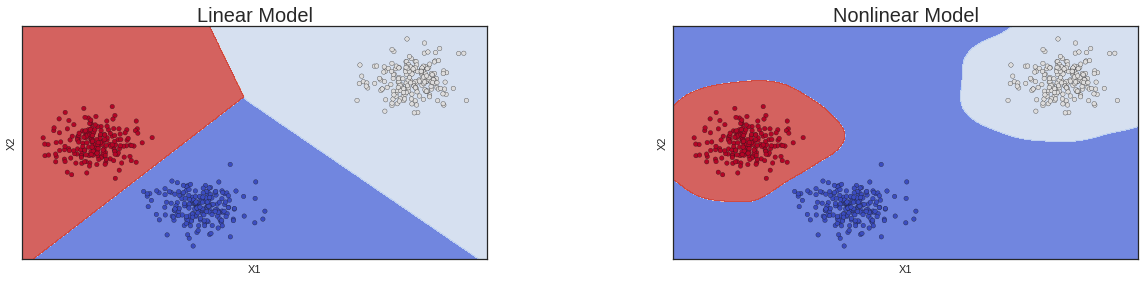

In [54]:
# title for the plots
titles = ['Linear Model', 'Nonlinear Model']

fig = plt.figure(figsize=(20,10))
for i, clf in enumerate((svc, rbf_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i], fontsize=20)

plt.show()

# 4. Save Model

<img src='./image_files/Supervised learning.png', width=500>

- cPickle을 이용하여 학습된 모델 저장

In [55]:
from six.moves import cPickle

In [56]:
cPickle.dump(svc, open('./data_files/svc_model.pkl', 'wb'))

In [57]:
from six.moves import cPickle

In [58]:
cPickle.dump(svc, open('./data_files/svc_model.pkl', 'wb'))

- 학습된 모델 불러오기

In [59]:
svc_restore = cPickle.load(open('./data_files/svc_model.pkl', 'rb'))

- 새로운 데이터로 테스트해보기

In [60]:
X_new = np.array([-5,4])
X_new = X_new.reshape(1,-1)
X_new.shape

(1, 2)

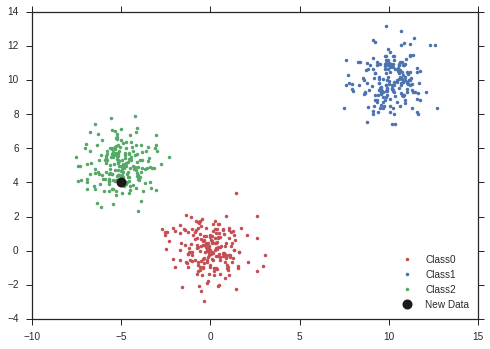

In [61]:
plt.plot(X[y==0,0], X[y==0,1], 'r.', label='Class0')
plt.plot(X[y==1,0], X[y==1,1], 'b.', label='Class1')
plt.plot(X[y==2,0], X[y==2,1], 'g.', label='Class2')
plt.plot(X_new[0,0], X_new[0,1], 'ko', label='New Data', ms=5, mew=5)
plt.legend(loc='lower right')
plt.show()

- 내용추가

In [62]:
svc_restore.predict(X_new)

array([ 2.])